In [1]:
import library as l

import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import datetime
import os

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
file='aggressive_dedup.json'
size = 5000
topsize = 300

seed1 = np.random.randint(size)
#seed2 = np.random.randint(size)
today = datetime.date.today()

savestring = 'seed_' + str(seed1) + '_size_' + str(size) + '_topsize_' + str(topsize) + '_date_' + str(today)

if not os.path.exists(savestring):
    os.makedirs(savestring)

In [3]:
data, time, ratings, seen, indices = l.get_data(year='2001', size=size, limit=10000000)

l.save_file(savestring + '/indices.data', indices)
l.save_file(savestring + '/seen.data', seen)

l.simplify_ratings(data, ratings)
l.save_file(savestring + '/ratings.data', ratings)

#data2 = l.stopwords_filter(data)

l.selection_print(data, ratings)

2001 >>> 5000 [0.2 0.8]
2002 >>> 5000 [0.2 0.8]
2003 >>> 5000 [0.2 0.8]
2004 >>> 5000 [0.24 0.76]
2005 >>> 5000 [0.24 0.76]
2006 >>> 5000 [0.23 0.77]
2007 >>> 5000 [0.21 0.79]
2008 >>> 5000 [0.22 0.78]
2009 >>> 5000 [0.22 0.78]
2010 >>> 5000 [0.23 0.77]
2011 >>> 5000 [0.25 0.75]
2012 >>> 5000 [0.22 0.78]
2013 >>> 5000 [0.21 0.79]
2014 >>> 5000 [0.21 0.79]


In [4]:
LR = LogisticRegression(penalty='l1', n_jobs=-1, solver='saga', max_iter=300)
#LR = LogisticRegression(penalty='l1', n_jobs=-1, solver='saga', max_iter=100, class_weight='balanced')

CV = CountVectorizer(ngram_range=(1,2), analyzer='word', min_df=5) #, max_features=20000)

features = []
x = sorted(list(data.keys()))

In [5]:
for i, key in enumerate(x):
    LR, CV = l.predict_scores(data[key], ratings[key], CV, LR, i, key, savestring, features)
    
    if i == 0:
        top_f = [[x,[len(features)-i]] for i, (_,x) in enumerate(sorted(zip(LR.coef_[0],features)))][:-topsize:-1]
        bot_f = [[x,[i+1]] for i, (_,x) in enumerate(sorted(zip(LR.coef_[0],features)))][:topsize]
    else:
        for i, m in enumerate(top_f):
            top_f[i][1] += [len(features)-i for i, (_,x) in enumerate(sorted(zip(LR.coef_[0],features))) if x == m[0]]
        for i, m in enumerate(bot_f):
            bot_f[i][1] += ([i+1 for i, (_,x) in enumerate(sorted(zip(LR.coef_[0],features))) if x == m[0]])

l.save_file(savestring + '/top_f.data', top_f)
l.save_file(savestring + '/bot_f.data', bot_f)

D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.84
2001
f1: [0.52941176 0.90361446]
recall: [0.44117647 0.94221106]
precision: [0.66176471 0.86805556]

0.838
2002
f1: [0.52352941 0.90240964]
recall: [0.48108108 0.9190184 ]
precision: [0.57419355 0.88639053]

0.833
2003
f1: [0.50445104 0.89957907]
recall: [0.42929293 0.93266833]
precision: [0.61151079 0.86875726]

0.832
2004
f1: [0.59808612 0.89380531]
recall: [0.52742616 0.9266055 ]
precision: [0.69060773 0.86324786]

0.797
2005
f1: [0.53758542 0.86995516]
recall: [0.45559846 0.91632928]
precision: [0.65555556 0.82804878]

0.845
2006
f1: [0.55840456 0.90600364]
recall: [0.5025641  0.92795031]
precision: [0.62820513 0.88507109]

0.845
2007
f1: [0.56338028 0.90577508]
recall: [0.46948357 0.94663278]
precision: [0.70422535 0.86829837]

0.833
2008
f1: [0.48297214 0.90041741]
recall: [0.3880597  0.94493116]
precision: [0.63934426 0.85990888]

0.815
2009
f1: [0.44444444 0.8890222 ]
recall: [0.39153439 0.91368681]
precision: [0.51388889 0.86565421]

0.818
2010
f1: [0.56872038 0.88466413]

In [6]:
for i in range(len(x)):
    print(sum([1/x[1][i] for x in top_f])/len(top_f))

0.021001105508248057
0.01588565390556505
0.015912985849074447
0.016069306048953236
0.016125105736135965
0.01614483980679351
0.015839133162488125
0.016331297435641403
0.015872972167929968
0.015165366962964314
0.015012190023429479
0.015456717491419395
0.014096950015884126
0.014021394724037649


In [7]:
for i in range(len(x)):
    print(sum([1/x[1][i] for x in bot_f])/len(bot_f))

0.020942212934331673
0.014739118776426488
0.012955158058011845
0.0142808184502487
0.015062211674916523
0.015462120241312383
0.012998862806797962
0.014579916247894242
0.013988235197459
0.013306693581732853
0.011590223119734637
0.012878271891746866
0.011592411288714436
0.011581156879866217


In [8]:
top_f

[['great', [1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 ['best', [2, 19, 44, 31, 10, 3, 5, 9, 10, 13, 7, 5, 28, 19]],
 ['the best', [3, 47, 6, 4, 6, 9, 10, 13, 12, 19, 17, 16, 45, 32]],
 ['excellent', [4, 4, 2, 3, 2, 6, 2, 4, 7, 10, 20, 10, 19, 13]],
 ['this is', [5, 12, 10, 43, 33, 5, 38, 7, 42, 6, 28, 56, 35, 178]],
 ['highly', [6, 3, 5, 7, 3, 7, 9, 6, 4, 9, 10, 12, 26, 31]],
 ['wonderful', [7, 1, 3, 5, 5, 25, 8, 24, 25, 31, 34, 35, 31, 37]],
 ['easy', [8, 17, 38, 12, 7, 4, 3, 5, 9, 4, 2, 3, 6, 4]],
 ['well', [9, 65, 31, 10, 22, 78, 7, 3, 6, 5, 4, 4, 4, 5]],
 ['perfect', [10, 168, 11, 13, 15, 13, 17, 10, 11, 22, 12, 6, 3, 3]],
 ['not only',
  [11, 98, 837, 14, 20, 76, 146, 128, 104, 333, 113, 96, 844, 270]],
 ['life', [12, 970, 51, 20, 24, 21, 34, 19, 15, 46, 45, 39, 39, 245]],
 ['enjoy', [13, 14670, 40, 124, 23, 129, 32, 185, 47, 106, 101, 510, 67, 155]],
 ['is great', [14, 27, 63, 61, 17, 84, 46, 22, 18, 86, 37, 50, 116, 89]],
 ['loved', [15, 170, 13, 42, 8, 10, 11, 50, 53, 45, 13

['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'] [79944, 82750, 87948, 105154, 144502, 159232, 241791, 275799, 352714, 461740, 731465, 1389066, 3394115, 2376696]


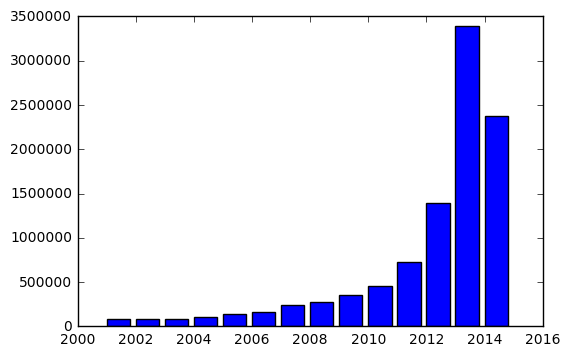

In [9]:
x = sorted(list(data.keys()))
y = [seen.get(yr) for yr in x]

print(x, y)

plt.bar(x, y)
plt.show()